<a href="https://www.kaggle.com/code/manthanvarmas/letterbox-movie-eda?scriptVersionId=247255191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import re
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
df = pd.read_csv('/kaggle/input/letterbox-movie-classification-dataset/Letterbox Movie Classification Dataset.csv')
df.head()

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
def safe_parse_list(value):
    try:
        parsed = ast.literal_eval(value)
        if isinstance(parsed, list):
            return parsed
        else:
            return [str(parsed)]
    except:
        return [str(value)]

In [5]:
df['Genres'] = df['Genres'].apply(safe_parse_list)
df['Studios'] = df['Studios'].apply(safe_parse_list)

In [6]:
print(df.isnull().sum())
df.dropna(subset=['Runtime', 'Average_rating'], inplace=True)

Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest★              0
Medium★★★            0
Highest★★★★★         0
Total_ratings        0
dtype: int64


In [7]:
df['Original_language'] = df['Original_language'].astype('category')
df['Director'] = df['Director'].astype('category')

In [8]:
df.head()

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,The Fan,Eckhart Schmidt,3.57,"[Horror, Drama]",92.0,German,The hero-worship that Simone has for a pop sin...,[Barbara Moorse Workshop],12841,11032,3763,79,129,1660,714,9042
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,"[Warner Bros. Pictures, Village Roadshow Pictu...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,Suspiria,Dario Argento,3.93,[Horror],99.0,English,An American newcomer to a prestigious German b...,[Seda Spettacoli],618171,220094,219548,13000,2814,53427,88628,443757
3,Lost in Translation,Sofia Coppola,3.79,"[Drama, Comedy, Romance]",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","[American Zoetrope, Elemental Films]",1596190,254180,493248,38000,15167,155110,193717,1076949
4,Akira,Katsuhiro Otomo,4.28,"[Animation, Action, Science Fiction]",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"[MBS, Sumitomo Corporation, TOHO, Studio Fuga,...",873068,175586,341567,21000,1822,40850,196532,600721


In [9]:
df.describe()

,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,3.268535,103.169352,1.703148e+05,26868.798600,4.373479e+04,1652.549700,1837.319600,17887.078300,1.817158e+04,1.063923e+05
std,0.525744,38.070735,4.585329e+05,56751.328696,1.515314e+05,9368.258118,5617.492419,43713.123082,8.323460e+04,2.947343e+05
min,1.080000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.950000,89.000000,2.979750e+03,1674.000000,4.570000e+02,2.000000,35.000000,422.750000,6.000000e+01,1.895000e+03
50%,3.268535,99.000000,1.842500e+04,6503.000000,3.394000e+03,24.000000,181.000000,2422.500000,5.720000e+02,1.182300e+04
75%,3.620000,113.000000,1.083580e+05,23908.250000,2.011225e+04,283.000000,1083.250000,12727.000000,4.583250e+03,6.749875e+04
max,4.710000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,176637.000000,629879.000000,2.010363e+06,4.091037e+06


In [10]:
print("Unique languages:", df['Original_language'].nunique())
print("Top 5 languages:\n", df['Original_language'].value_counts().head())

Unique languages: 57
Top 5 languages:
 Original_language
English     8074
Italian      396
Japanese     308
French       291
Korean       145
Name: count, dtype: int64


In [11]:
top_watched = df.sort_values(by='Watches', ascending=False).head(10)
top_watched[['Film_title', 'Director', 'Watches']]

,Film_title,Director,Watches
9825,Barbie,Greta Gerwig,5195503
265,Fight Club,David Fincher,5059722
243,Interstellar,Christopher Nolan,5044987
7553,Parasite,Bong Joon Ho,5015041
7551,Joker,Todd Phillips,4952400
136,The Dark Knight,Christopher Nolan,4488171
9816,Spider-Man: Into the Spider-Verse,"Bob Persichetti, Peter Ramsey",4446217
88,La La Land,Damien Chazelle,4393174
54,Pulp Fiction,Quentin Tarantino,4386659
18,The Truman Show,Peter Weir,4382819


In [12]:
top_liked = df.sort_values(by='Likes', ascending=False).head(10)
top_liked[['Film_title', 'Likes']]

,Film_title,Likes
7553,Parasite,2730813
243,Interstellar,2417030
265,Fight Club,2325525
9816,Spider-Man: Into the Spider-Verse,2210461
9825,Barbie,2140382
136,The Dark Knight,1986315
88,La La Land,1979547
7551,Joker,1930493
54,Pulp Fiction,1907834
11,Get Out,1867622


In [13]:
genre_list = df['Genres'].explode()
genre_counts = Counter(genre_list)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df.sort_values(by='Count', ascending=False).head(10)

,Genre,Count
1,Drama,4416
5,Comedy,2932
10,Thriller,2312
4,Action,2074
0,Horror,1812
14,Crime,1523
2,Adventure,1448
6,Romance,1373
3,Science Fiction,1265
8,Fantasy,995


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


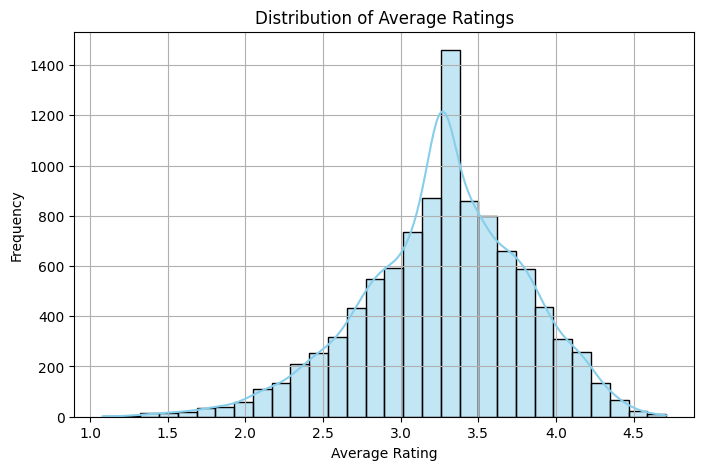

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Average_rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


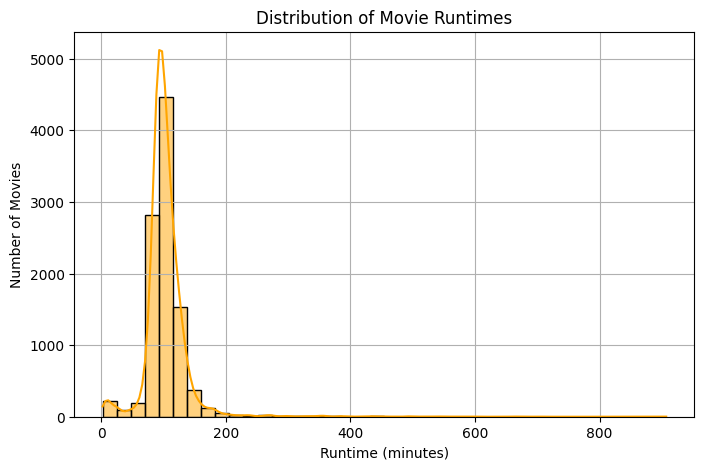

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Runtime'], bins=40, kde=True, color='orange')
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


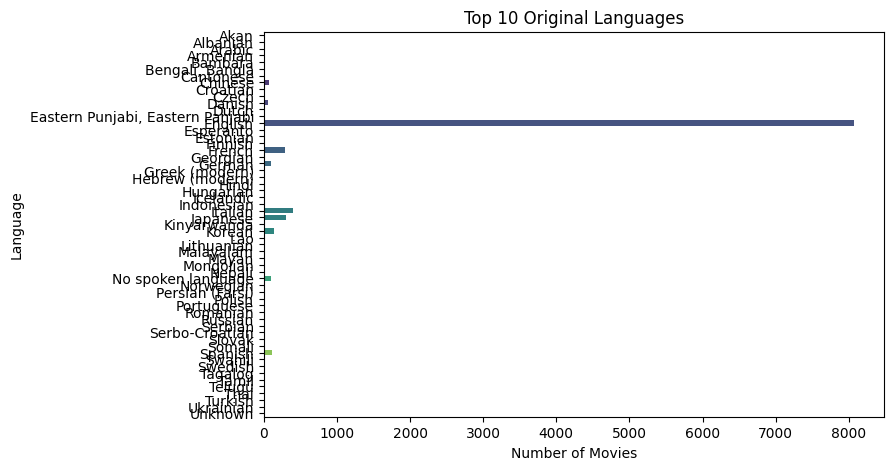

In [16]:
lang_counts = df['Original_language'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette='viridis')
plt.title("Top 10 Original Languages")
plt.xlabel("Number of Movies")
plt.ylabel("Language")
plt.show()

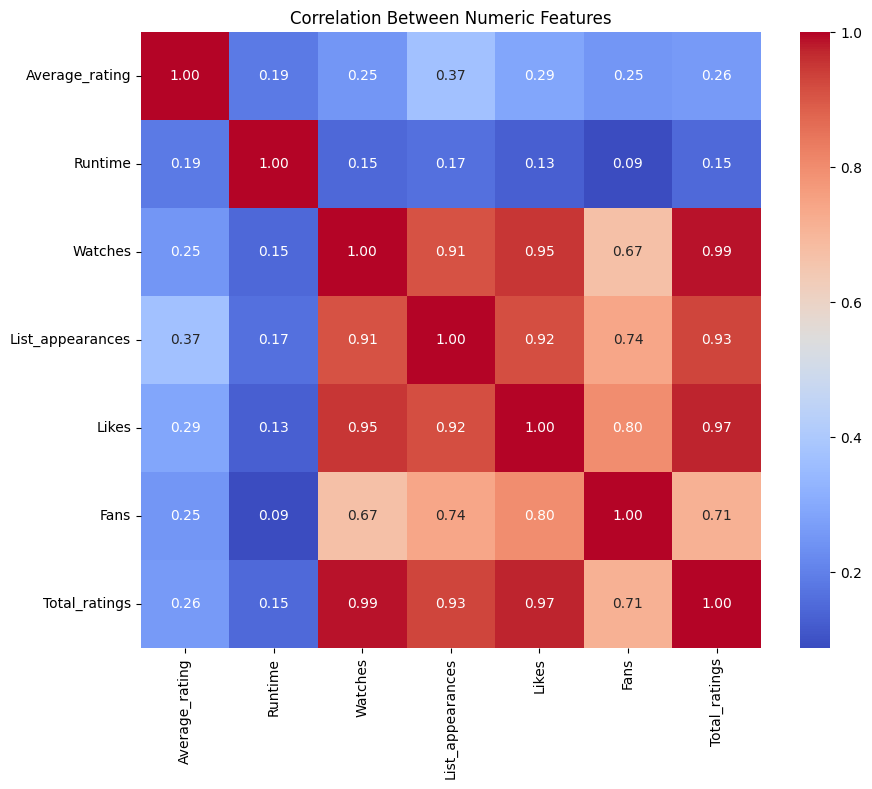

In [17]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Lowest★', 'Medium★★★', 'Highest★★★★★'])  # Optionally drop detailed rating breakdown
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

In [18]:
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_, index=df.index)

df_genres = pd.concat([df, genre_dummies], axis=1)

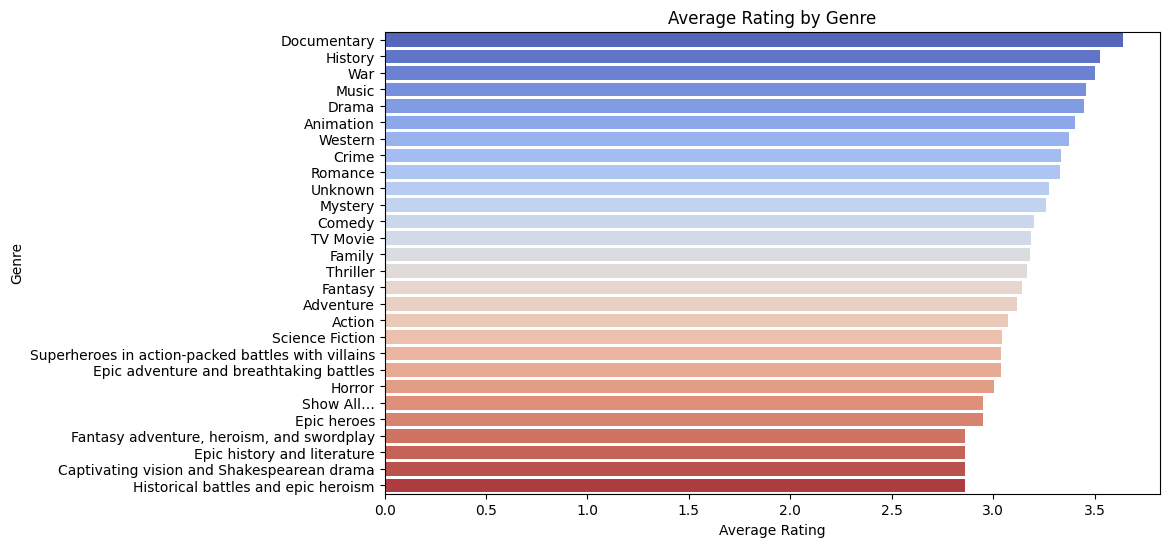

In [19]:
genre_rating = {}

for genre in mlb.classes_:
    genre_rating[genre] = df_genres[df_genres[genre] == 1]['Average_rating'].mean()

genre_rating_df = pd.DataFrame.from_dict(genre_rating, orient='index', columns=['Avg_Rating'])
genre_rating_df = genre_rating_df.sort_values(by='Avg_Rating', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Rating', y=genre_rating_df.index, data=genre_rating_df, palette='coolwarm')
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

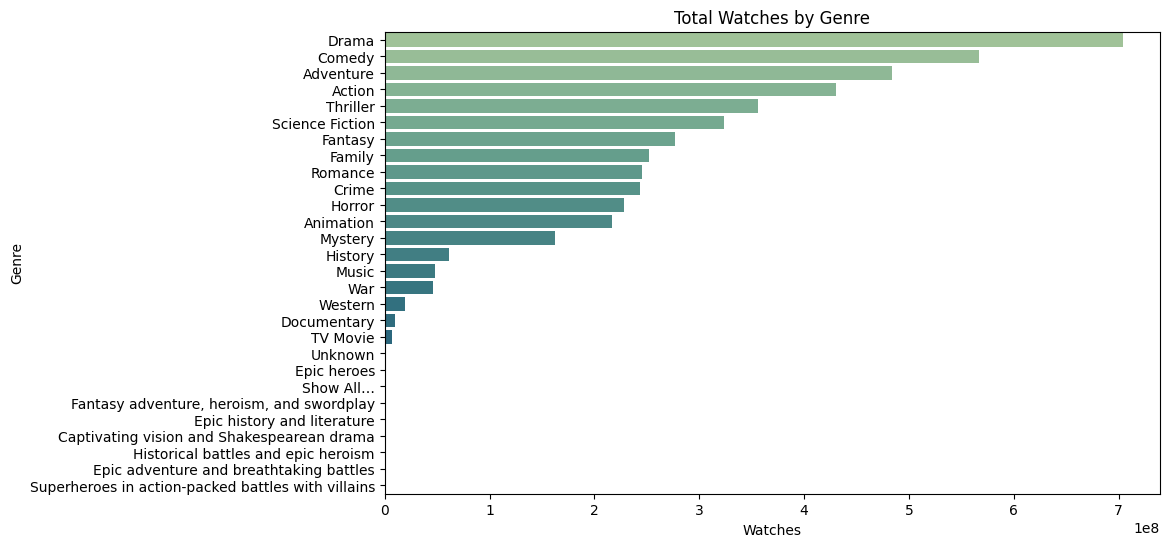

In [20]:
genre_watch = {}

for genre in mlb.classes_:
    genre_watch[genre] = df_genres[df_genres[genre] == 1]['Watches'].sum()

genre_watch_df = pd.DataFrame.from_dict(genre_watch, orient='index', columns=['Total_Watches'])
genre_watch_df = genre_watch_df.sort_values(by='Total_Watches', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Total_Watches', y=genre_watch_df.index, data=genre_watch_df, palette='crest')
plt.title("Total Watches by Genre")
plt.xlabel("Watches")
plt.ylabel("Genre")
plt.show()

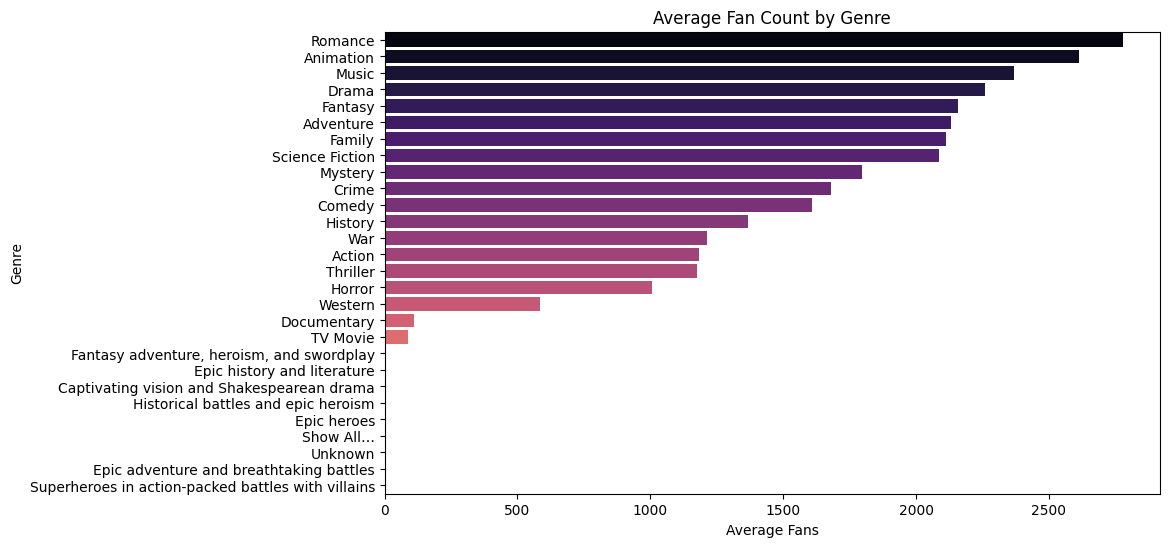

In [21]:
genre_fans = {}

for genre in mlb.classes_:
    genre_fans[genre] = df_genres[df_genres[genre] == 1]['Fans'].mean()

genre_fans_df = pd.DataFrame.from_dict(genre_fans, orient='index', columns=['Avg_Fans'])
genre_fans_df = genre_fans_df.sort_values(by='Avg_Fans', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Fans', y=genre_fans_df.index, data=genre_fans_df, palette='magma')
plt.title("Average Fan Count by Genre")
plt.xlabel("Average Fans")
plt.ylabel("Genre")
plt.show()

In [22]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['Cleaned_Description'] = df['Description'].apply(clean_text)

In [23]:
df.head()

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings,Cleaned_Description
0,The Fan,Eckhart Schmidt,3.57,"[Horror, Drama]",92.0,German,The hero-worship that Simone has for a pop sin...,[Barbara Moorse Workshop],12841,11032,3763,79,129,1660,714,9042,the heroworship that simone has for a pop sing...
1,Mad Max: Fury Road,George Miller,4.18,"[Adventure, Science Fiction, Action]",121.0,English,An apocalyptic story set in the furthest reach...,"[Warner Bros. Pictures, Village Roadshow Pictu...",2488721,331681,927538,38000,12530,158356,511140,1682389,an apocalyptic story set in the furthest reach...
2,Suspiria,Dario Argento,3.93,[Horror],99.0,English,An American newcomer to a prestigious German b...,[Seda Spettacoli],618171,220094,219548,13000,2814,53427,88628,443757,an american newcomer to a prestigious german b...
3,Lost in Translation,Sofia Coppola,3.79,"[Drama, Comedy, Romance]",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","[American Zoetrope, Elemental Films]",1596190,254180,493248,38000,15167,155110,193717,1076949,two lost souls visiting tokyo the young negle...
4,Akira,Katsuhiro Otomo,4.28,"[Animation, Action, Science Fiction]",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"[MBS, Sumitomo Corporation, TOHO, Studio Fuga,...",873068,175586,341567,21000,1822,40850,196532,600721,a secret military project endangers neotokyo w...


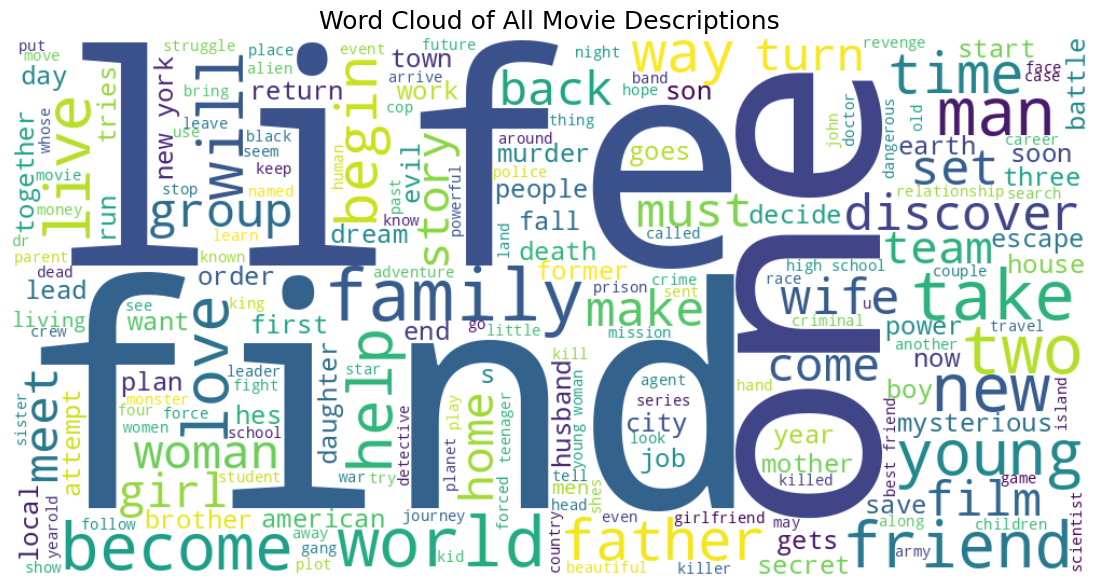

In [24]:
all_text = ' '.join(df['Cleaned_Description'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Movie Descriptions", fontsize=18)
plt.show()

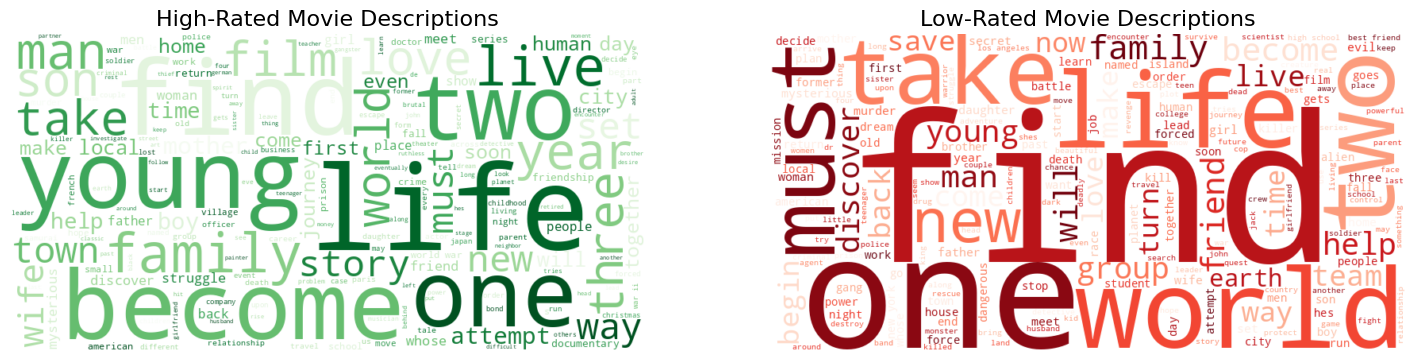

In [25]:
high_rated = df[df['Average_rating'] >= 4.2]
low_rated = df[df['Average_rating'] <= 3.0]

high_text = ' '.join(high_rated['Cleaned_Description'])
high_cloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(high_text)

low_text = ' '.join(low_rated['Cleaned_Description'])
low_cloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(low_text)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
ax1.imshow(high_cloud, interpolation='bilinear')
ax1.axis('off')
ax1.set_title("High-Rated Movie Descriptions", fontsize=16)

ax2.imshow(low_cloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title("Low-Rated Movie Descriptions", fontsize=16)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


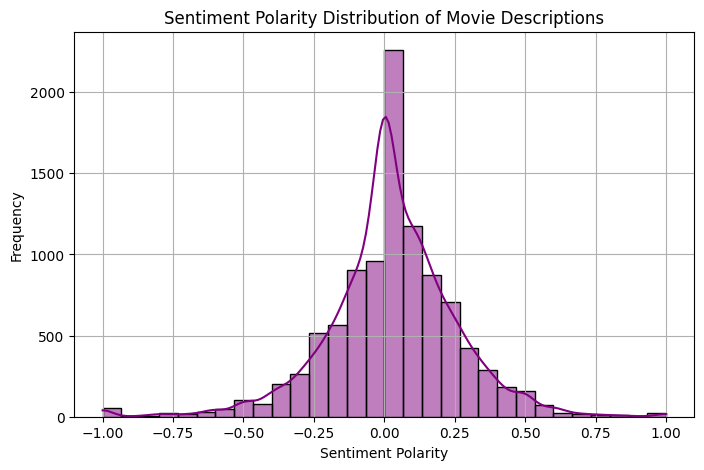

In [26]:
df['Sentiment'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution of Movie Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

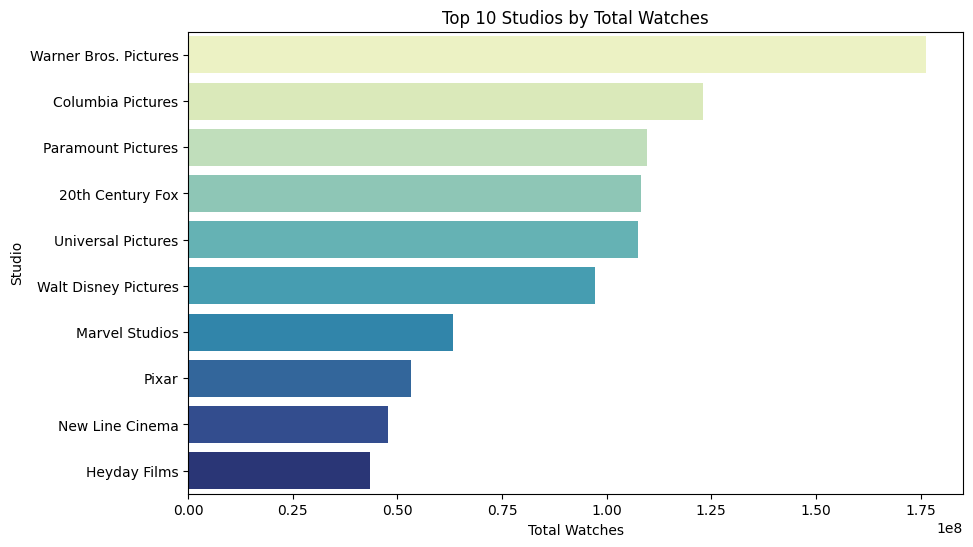

In [27]:
studio_list = df['Studios'].explode()
df_exploded = df.explode('Studios')  # so we can use it for aggregation

studio_watch = df_exploded.groupby('Studios')['Watches'].sum()
top_studios_watch = studio_watch.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_studios_watch.values, y=top_studios_watch.index, palette='YlGnBu')
plt.title("Top 10 Studios by Total Watches")
plt.xlabel("Total Watches")
plt.ylabel("Studio")
plt.show()

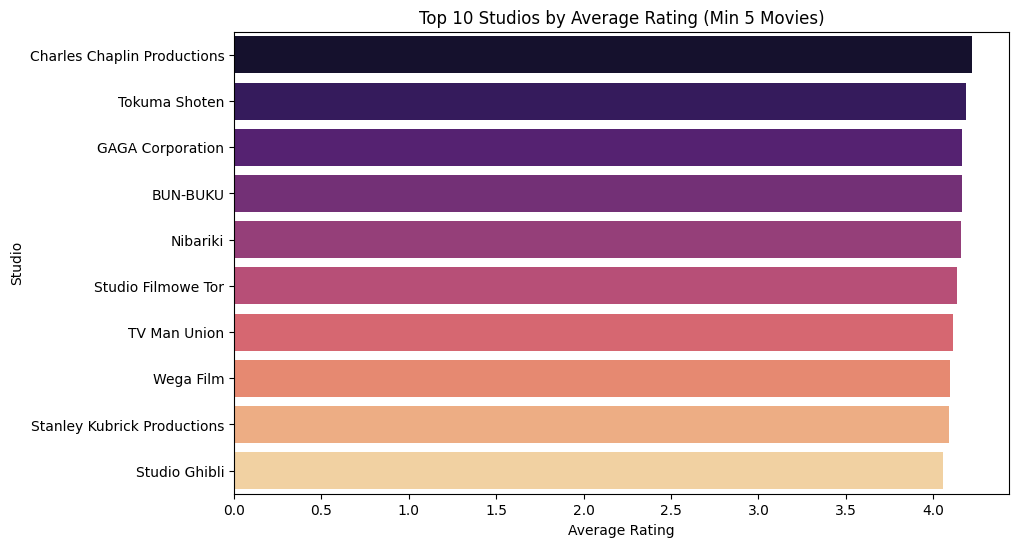

In [28]:
studio_counts = df_exploded['Studios'].value_counts()
frequent_studios = studio_counts[studio_counts >= 5].index

studio_rating = df_exploded[df_exploded['Studios'].isin(frequent_studios)].groupby('Studios')['Average_rating'].mean()
top_studios_rating = studio_rating.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_studios_rating.values, y=top_studios_rating.index, palette='magma')
plt.title("Top 10 Studios by Average Rating (Min 5 Movies)")
plt.xlabel("Average Rating")
plt.ylabel("Studio")
plt.show()